In [40]:
import numpy as np
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve, norm #, inv, eigsh

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc

import matplotlib.animation # animaciones
from IPython.display import HTML # ver animaciones en notebook

from scipy.interpolate import interp1d

#from celluloid import Camera #pip install celluloid si es que no lo tienen.

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Tomás Banduc

# Laboratorio 2

**Objetivo General:** Aplicar el Método de Diferencias Finitas en varias variables sobre modelos de evolución de primer orden.

**Objetivo Particular:** Se estudiará la ecuación de advección de primer orden y la ecuación de Burgers como modelo no-lineal en el estudio del tráfico vehicular.

# Parte I

## Ecuación de Advección

Sea el problema de advección de primer orden sujeto a condición de borde periódica sobre el intervalo $(0,1)$:<br>
<br>
\begin{align*}
(A)\quad\left\{
\begin{array}{rll}
\displaystyle{\frac{\partial u}{\partial t}+\alpha\frac{\partial u}{\partial x}}  &
=0 & \qquad\text{para }\left(  t,x\right)  \in(0,+\infty)\times\left(  0,1\right) \\
u(t,x+1)  &  =u(t,x) & \qquad\text{para }\left(  t,x\right)  \in\lbrack
0,+\infty)\times\left[0,1\right] \\
u\left(  0,x\right)   &  =u_{0}(x) & \qquad\text{para }x\in\left[0,1\right]
\end{array}
\right.
\end{align*}

con $\alpha>0$y $u_0$ suficientemente regular.

Existen varios esquemas numéricos basados en diferencias finitas para analizar la ecuación anterior. Dadas sus particularidades, elegir un método por sobre otro resulta difícil.

Los esquemas de tipo Lax son frecuentemente utilizados para resolver este tipo de problemas, siendo los más simples los de Lax-Friedrichs y Lax-Wendroff, dados por:

\begin{align*}
    &(LF)\quad\dfrac{2u_j^{n+1}-(u_{j+1}^n+u_{j-1}^n)}{2\Delta t} +\alpha\cdot \dfrac{u_{j+1}^n - u_{j-1}^n}{2\Delta x} = 0\\
    &(LW)\quad \dfrac{u_j^{n+1}-u_j^n}{\Delta t}+\alpha \cdot \dfrac{u_{j+1}^n-u_{j-1}^n}{2\Delta x}+\alpha^2 \Delta t\cdot\dfrac{2u_j^n-(u_{j+1}^n+u_{j-1}^n)}{2\Delta x^2} = 0
\end{align*}
<br>
donde $u_j^n:=u(x_j,t_n)$ es la aproximación de una función $u$ para un mallado espacial de paso $\Delta x>0$ y una discretización temporal $\Delta t>0$, con $x_j:=\Delta x \cdot j$ y $t_n:=\Delta t\cdot n$

### P1

> **a.** Programe una función `resolver_adveccion` que resuelva numéricamente esta ecuación hasta tiempo $T>0$ por cada uno de los esquemas numéricos presentados anteriormente. Las entradas del programa deben ser $\alpha$, $\Delta t$, $N_{T}$, $N$ y $u_{0}$, donde $N_{T}$ es un entero que satsiface $N_t\Delta t = T$ y corresponde con una discretización del intervalo $[0,T]$ en $N_T+1$ puntos:<br>
<br>
\begin{align*}
 I_T:=\{0,\Delta t,...,(N_T-1)\Delta t,N_T\Delta t \}\subseteq [0,T]
 \end{align*}

In [55]:
def resolver_adveccion(alpha, dt, NT, N, u0, esquema):
    """
    Resuelve la ecuación de advección $\partial_t u + \alpha \partial_x u = 0$
    con condiciones periódicas, en el dominio (0,1) y un intervalo de tiempo [0,T].
    -------
    Input:
    - alpha: float
    - dt: float
        Paso temporal para el que se resolvera la ecuación.
    - NT: int
        Cumple NT * dt = T.
    - N: int
        Cantidad de subintervalos en que se discretizará el dominio.
    - u0: callable
        Función con la condición inicial del problema.
    - esquema: {'LW', 'LF'}
        Esquema usado para resolver la ecuación.
        - 'LW': Lax-Wendroff
        - 'LF': Lax-Friedrich
    -------
    Output:
    - x: numpy array, largo N+2
        Discretización del dominio donde se calculó la solución.
    - U: numpy array de (N+2)x(NT+1)
        Solución, evaluada en la grilla en cada paso de tiempo. U[j,n] es la solución en x_j,
        en el tiempo t = n*dt.
    -------
    """
    T = NT*dt
    dx= 1/N
    x = np.linspace(0, 1, N + 2)

    if esquema=="LF":
      J = np.arange(0,N+2)
      Jb = np.roll(J,1)
      Jf = np.roll(J, -1)

      U = np.zeros([N+2, NT+1])
      U[:,0] = u0(x)
      for n in range(NT):
        U[J,n+1] = (1/2 - alpha*dt/(2*dx)) * U[Jf,n] +  (1/2 + alpha*dt/(2*dx)) * U[Jb,n]
    else:
      J = np.arange(0,N+2)
      Jb = np.roll(J,1)
      Jf = np.roll(J, -1)

      U = np.zeros([N+2, NT+1])
      U[:,0] = u0(x)
      for n in range(NT):
        U[J,n+1] = (((alpha*dt/dx)**2)/2 - alpha*dt/(2*dx)) * U[Jf,n] +  ( ((alpha*dt/dx)**2)/2 + alpha*dt/(2*dx)) * U[Jb,n] + ( 1- (alpha*dt/dx)**2 ) * U[J,n]

    return x, U


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\spinc\AppData\Local\Temp\ipykernel_11060\2779330220.py:2: SyntaxWarning: invalid escape sequence '\p'
  """


> **b.** Considere $\Delta x=0.01$, $\alpha=1$, $\Delta t = \frac{\lambda}{\alpha}\Delta x$, $T=2$ y la condición inicial $u_{0}\left(  x\right)  =\sin\left(  2\pi x\right)  $. Calcule la solución numérica para $\lambda\in\left\{  0.8,0.4,0.1\right\}  $ y, para cada valor de $\lambda$, grafique los resultados de cada método junto con la solución exacta.<br>
<br> **Indicación**: Discuta los resultados en función de $\lambda$ y del tipo de
ecuación equivalente asociada a cada esquema. <br>
<br>**Indicación:** Cree una animación para observar la evolución de sus soluciones. Puede serle útil Investigar el método ```FuncAnimation``` de ```matplotlib```.



In [56]:
def animar_soluciones(x, ULF, ULW, u, lam):
  r"""
  Función para graficar y animar las soluciones de cada método.
  Utiliza la función FuncAnimation de matplotlib.
  --------
  Input:
  - x: array
      Discretización de [0,1].
  - ULF, ULF: array
      Soluciones obtenidas con `resolver_adveccion` con los métodos LF y LW resp.
  - u: callable
      Función que entrega la solución real de la ecuación.
  --------
  Output:
  - ani: Objeto Animation de matplotlib.
      Puede utilizar el método HTML(ani.to_html5_video()) para ver en jupyter.
  --------
  """
  # Crea figura
  fig, ax = plt.subplots()

  # Funcion para animar
  def animate(i):
    ax.clear()
    u_v = [u(x1,i) for x1 in x]
    ax.plot(x, u_v, label = "u")
    ax.plot(x, ULF[:,i], label = "ULF")
    ax.plot(x, ULW[:,i], label = "ULW")
    ax.legend()
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$u(x, t)$")
    ax.set_title(r"Ecuación de Advección Periódica en [0,1] con $\lambda$ = " + str(lam))
    #ax.text(0.85, 0.9, f"t = {np.round(a = T[i], decimals = 3)}", horizontalalignment ='left', verticalalignment ='center', transform = ax.transAxes)
    ax.legend(loc = "upper left")

  NT = ULF.shape[1]
  # Animación
  return matplotlib.animation.FuncAnimation(fig, animate, frames = NT , interval = 50 , repeat = True)

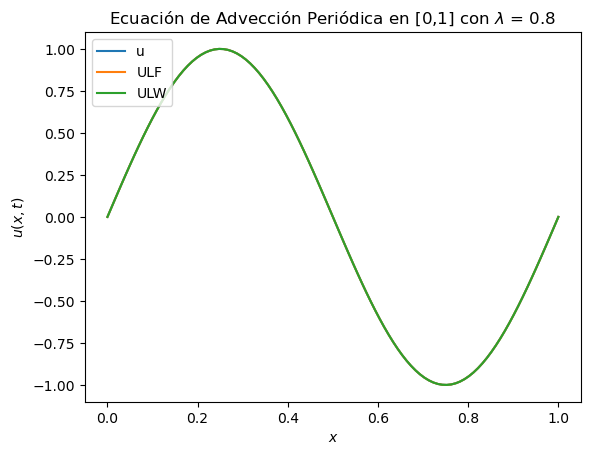

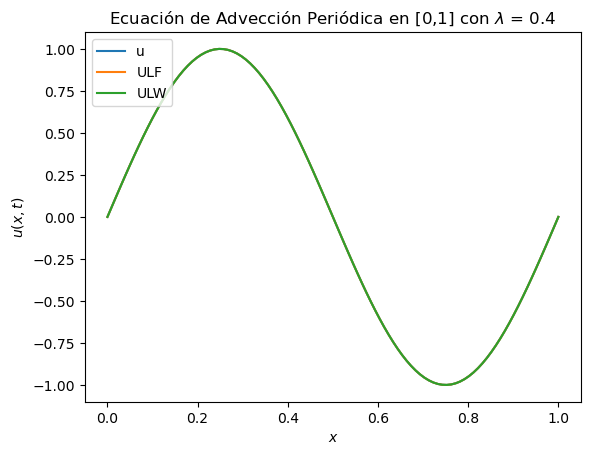

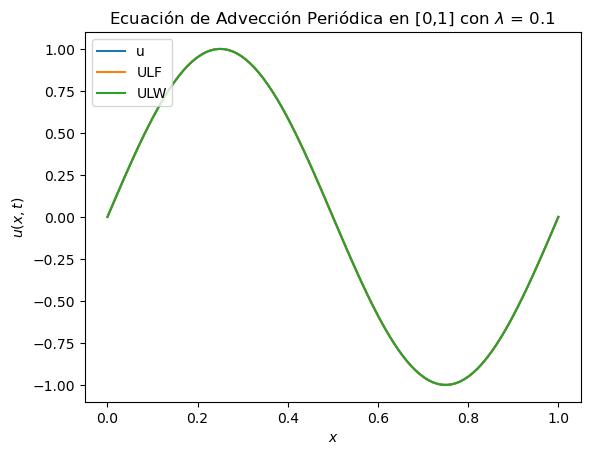

In [43]:
dx, alpha, T = 0.01, 1, 2
u0 = lambda x: np.sin(2*np.pi*x)


animaciones = []
for lam in [0.8, 0.4, 0.1]:
  dt = (lam/alpha)*dx
  NT = int(T/dt)
  N = int(1/dx)
  u = lambda x,i:u0(x - alpha*i*dt)

  x, ULF = resolver_adveccion(alpha, dt , NT, N, u0, "LF")
  x, ULW =  resolver_adveccion(alpha, dt , NT, N, u0, "LW")

  animaciones += [animar_soluciones(x, ULF, ULW, u, lam)]

#writergif = matplotlib.animation.PillowWriter(fps=30)
#for i, animacion in enumerate(animaciones): animacion.save(f"animacion{i}.gif", writer=writergif)
#HTML(animaciones[0].to_html5_video()) #lambda = 0.8
HTML(animaciones[1].to_html5_video())  #lambda = 0.4
#HTML(animaciones[2].to_html5_video()) #lambda = 0.1

> **c.** Repita lo anterior, considerando ahora la condición inicial: <br>
<br>
\begin{align*}
u_{0}\left(  x\right)  =\left\{
\begin{array}
[c]{cl}
1/2 & \text{si }x\in\left[  0.3,0.7\right]  \\
-1/2 & \text{si }x\in\left[  0,1\right]  \setminus [  0.3,0.7]
\end{array}
\right.
\end{align*}<br>
**Indicación:** Considere una extensión periódica de $u_{0}$, la cual puede ser útil para graficar la solución real.

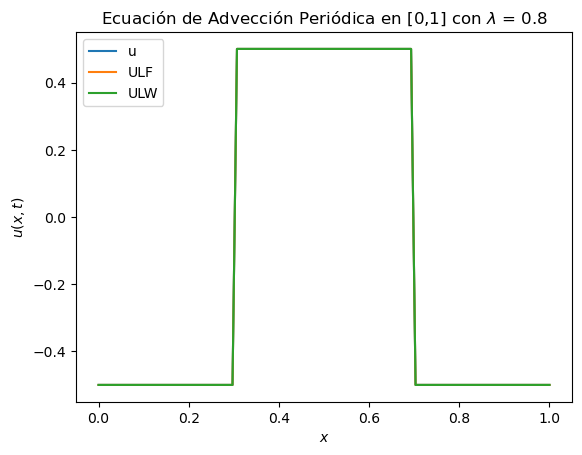

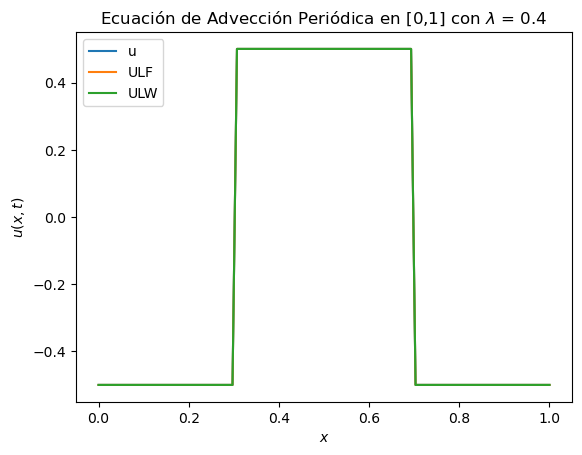

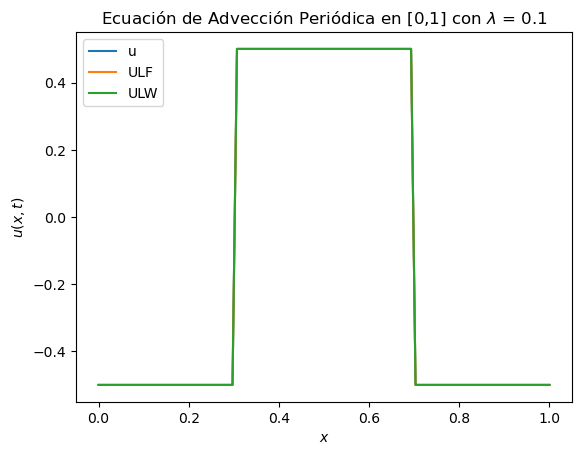

In [57]:
dx, alpha, T = 0.01, 1, 2
u0 = lambda x: np.where(np.logical_and( x%1>=0.3, x%1<=0.7), 1/2, -1/2)


animaciones = []
for lam in [0.8, 0.4, 0.1]:
  dt = (lam/alpha)*dx
  NT = int(T/dt)
  N = int(1/dx)
  u = lambda x,i: u0(x - alpha*i*dt)

  x, ULF = resolver_adveccion(alpha, dt , NT, N, u0, "LF")
  x, ULW =  resolver_adveccion(alpha, dt , NT, N, u0, "LW")

  animaciones += [animar_soluciones(x, ULF, ULW, u, lam)]

HTML(animaciones[0].to_html5_video())
#writergif = matplotlib.animation.PillowWriter(fps=30)
#for i, animacion in enumerate(animaciones): animacion.save(f"animacion_cuadrada_{i}.gif", writer=writergif)

# Parte II

## Ecuación de Burgers en Tráfico Vehicular

Uno de los problemas más complicados en la ingeniería de transporte es modelar el funcionamiento de los semáforos. Un modelo continuo para el tráfico en una única pista, donde no se permite adelantar automóviles, está dado por la ecuación de Burgers.<br>
<br>
Suponga que la velocidad máxima en una vía está dada por $V$ y que la densidad de vehículos por unidad de longitud en ella es $D > 0$. Suponga que en cada punto y estado de tiempo la velocidad $v$ y la densidad vehicular $\rho$ se relacionan mediante la ley:<br>
<br>
\begin{align*}
    v = V\cdot \left(1-\dfrac{\rho}{D}\right)
\end{align*}
Definiendo $u:=1-\dfrac{2\rho}{D}$, se tiene que $u$ satisface la ecuación de Burgers:
\begin{align*}
\begin{cases}
    \quad \dfrac{\partial u}{\partial t}(t,x) + u(t,x)\cdot\dfrac{\partial u}{\partial x}(t,x)=0\quad (t,x)\in(0,+\infty)\times\mathbb{R} \\
    \quad u(0,x)=u_0(x)\quad x\in\mathbb{R}
    \end{cases}
\end{align*}<br>
donde $-1\leq u \leq 1$.<br>
<br>
Cuando $u=-1$, los vehículos no se mueven, pues se alcanzó la densidad máxima posible, mientras que para $u=1$, la vía se encuentra totalmente vacía y el tránsito es a velocidad máxima.<br>
<br>
A diferencia de la ecuacion de advección, solo es posible obtener una forma implícita para la solución de este problema:<br>
<br>
\begin{align*}
    u(x,t)=u_0(x-u(x,t)\cdot t)
\end{align*}
<br>
Sin embargo, es posible estimar numéricamente la solución de la ecuación de Burgers mediante métodos numéricos adecuados. Para ello, resulta sumamente útil trabajar con su forma conservativa:<br>
<br>
\begin{align*}
\begin{cases}
    \quad \dfrac{\partial u}{\partial t}(t,x) + \dfrac{\partial}{\partial x}\left[\dfrac{u^2}{2}\right](t,x)=0\quad (t,x)\in(0,+\infty)\times\mathbb{R} \\
    \quad u(0,x)=u_0(x)\quad x\in\mathbb{R}
    \end{cases}
\end{align*}<br>
Los esquemas de Lax-Friedrichs y Lax-Wendroff se pueden ajustar a dicha formulación, pues se presentan para ecuaciones de la forma:<br>
<br>
\begin{align*}
\dfrac{\partial u}{\partial t} + \dfrac{\partial}{\partial x}\left[f(u)\right]=0
\end{align*}<br>


Definiendo $\lambda :=\dfrac{\Delta t}{\Delta x}$ y $f_j^n:=f(u_j^n)$, se tienen los esquemas de Lax-Friedrichs y Lax-Wendroff en su forma conservativa:<br>
<br>
* **Lax-Friedrichs conservativo:**
  1. $\quad F_j^n := \dfrac{1}{2}\cdot(f_{j-1}^n+f_j^n)-\dfrac{1}{2\lambda}\cdot({u_j^n-u_{j-1}^n})$<br><br>
  2. $\quad u_j^{n+1}=u_j^n-\lambda(F^n_{j+1}-F_j^n)$<br>
  <br>
* **Lax-Wendroff conservativo (esquema de Richtmyer)**:
  1. $\quad u_{j+1/2}^n:=\dfrac{1}{2}\cdot(u_{j+1}^n+u_j^n)-\dfrac{\lambda}{2}\cdot(f_{j+1}^n-f_j^n)$<br> $\quad u_{j-1/2}^n:=\dfrac{1}{2}\cdot(u_{j}^n+u_{j-1}^n)-\dfrac{\lambda}{2}\cdot(f_{j}^n-f_{j-1}^n)$<br><br>
  2. $\quad u_{j}^{n+1}=u_j^n-\lambda \left(f\left(u_{j+1/2}^n\right)-f\left(u_{j-1/2}^n\right)\right)$


A continuación, se simulará el efecto de un flujo de vehículos que entra a una calle a una velocidad mayor a la que tienen otros vehículos que circulan más adelante.

### P1

> Sea $f$ una función de clase $\mathcal{C}^{1}$, $T>0$ y $a,b\in\mathbb{R}$, con $a<b$. Considere la ecuación:<br>
<br>
\begin{align*}
(B)\quad\left\{
\begin{array}{rll}
\dfrac{\partial u}{\partial t}+\dfrac{\partial}{\partial x}\left[  f\left(
u\right)  \right]   &  =0 & \qquad\text{para }\left(  t,x\right)  \in
(0,T)\times\left(  a,b\right)  \\
u\left(  t,a\right)   &  =u_{a} & \qquad\text{para }t\in\left(  0,T\right]  \\
u\left(  t,b\right)   &  =u_{b} & \qquad\text{para }t\in\left(  0,T\right]  \\
u\left(  0,x\right)   &  =u_{0}(x) & \qquad\text{para }x\in\left[  a,b\right]
\end{array}
\right.
\end{align*}<br>
**a.** Implemente cada uno de los esquemas de Lax para resolver numéricamente esta ecuación mediante una función. Las entradas de cada programa deben ser la función $f$, $a$, $b$, las condiciones de frontera $u_{a}$ y $u_{b}$, $\Delta t>0$, $N_{T}\in\mathbb{N}$ tal que $N_{T}\Delta t=T$, $N\in\mathbb{N}$ como la cantidad de puntos interiores en su particion del intervalo $\left[  a,b\right]  $ y la condición inicial $u_{0}$ como un vector $\boldsymbol{u}_{0}=\left(  u_{j}^{0}\right)  \in\mathbb{R}^{N+2}$.

In [45]:
def resolver_LF(
    f: callable,
    a: float,
    b: float,
    ua: float,
    ub: float,
    dt: float,
    N_T: int,
    N: int,
    u0: callable,
    x: tuple,
    lam: float,
    J: np.array,
    Jb: np.array,
    Jf: np.array,
) -> np.array:

    # Removos los extremos de los arrays de índices
    J = J[1:-1]
    Jb = Jb[1:-1]
    Jf = Jf[1:-1]

    # Definir la matriz U de manera inductiva. La coordenada temporal será la segunda coordenada.
    U = np.zeros((N + 2, N_T + 2))
    if isinstance(u0, np.ndarray):
      U[:,0] = u0
    else:
      u0 = np.vectorize(u0)
      U[:, 0] = u0(x)
    U[0, :] = ua
    U[-1, :] = ub
    for n in range(1, N_T + 2):
        n -= 1  # Enumeración de los puntos interiores

        F_j1 = 1 / 2 * (f(U[J, n]) + f(U[Jf, n])) - 1 / (2 * lam) * (U[Jf, n] - U[J, n])
        F_j = 1 / 2 * (f(U[Jb, n]) + f(U[J, n])) - 1 / (2 * lam) * (U[J, n] - U[Jb, n])
        F = {"j": F_j, "j+1": F_j1}

        U[J, n + 1] = U[J, n] - lam * (F["j+1"] - F["j"])

    return U


def resolver_LW(
    f: callable,
    a: float,
    b: float,
    ua: float,
    ub: float,
    dt: float,
    N_T: int,
    N: int,
    u0: callable,
    x: tuple,
    lam: float,
    J: np.array,
    Jb: np.array,
    Jf: np.array,
) -> np.array:

    # Removos los extremos de los arrays de índices
    J = J[1:-1]
    Jb = Jb[1:-1]
    Jf = Jf[1:-1]

    # Definir la matriz U de manera inductiva. La coordenada temporal será la segunda coordenada.
    U = np.zeros((N + 2, N_T + 2))
    u0 = np.vectorize(u0)
    U[:, 0] = u0(x)
    U[0, :] = ua
    U[-1, :] = ub
    for n in range(1, N_T + 1):
        n -= 1  # Enumeración de los puntos interiores
        U[J, n + 1] = U[J, n] - lam * (
            f(0.5 * (U[J, n] + U[Jf, n]) - lam * 0.5 * (f(U[Jf, n]) - f(U[J, n])))
            - f(0.5 * (U[J, n] + U[Jb, n]) - lam * 0.5 * (f(U[J, n]) - f(U[Jb, n])))
        )

    return U


def resolver_B(
    f: callable,
    a: float,
    b: float,
    ua: float,
    ub: float,
    dt: float,
    N_T: int,
    N: int,
    u0: callable,
    esquema: str,
) -> tuple[np.array, np.array]:

    assert esquema in {"LW", "LF"}, "El esquema debe ser 'LW' o 'LF'."

    dx = (b - a) / (N + 1)
    lam = dt / dx
    x = np.linspace(a, b, N + 2)
    J = np.arange(0, N + 2)
    Jb = np.roll(J, 1)
    Jf = np.roll(J, -1)

    if esquema == "LF":
        U = resolver_LF(f, a, b, ua, ub, dt, N_T, N, u0, x, lam, J, Jb, Jf)
    else:
        U = resolver_LW(f, a, b, ua, ub, dt, N_T, N, u0, x, lam, J, Jb, Jf)

    return x, U


> **b.** Considere el dominio $\Omega=\left[  0,1\right]$, $D=1$, las condiciones de frontera $u\left(  t,0\right)  =0.5$ y $u\left(  t,1\right)  =0$ para todo $t>0$ y la condición inicial dada por:<br>
<br>
\begin{align*}
u_{0}\left(  x\right)  =\left\{
\begin{array}
[c]{cc}%
0.5 & \text{si }x<0.2\\
0 & \text{si }x\geq0.2
\end{array}
\right.
\end{align*}<br>
Resuelva numéricamente la ecuación de Burgers para este caso usando los esquemas conservativos de Lax-Friedrichs y Lax-Wendroff con $T=2$, $\Delta x\in\left\{  0.01,0.005,0.002\right\}  $ y $\Delta t=0.5\Delta x$. Grafique la velocidad y densidad apropiadamente.

In [46]:
f = lambda x: x**2 / 2
a = 0
b = 1
ua = 0.5
ub = 0
Dx = [0.01, 0.005, 0.002]
Dt = [0.5 * dx for dx in Dx]
T = 2
N_T_list = [int(T / dt) for dt in Dt]
u0 = lambda x: 0.5 if x < 0.2 else 0
N_list = [int((b - a) / dx) for dx in Dx]

sol_LF = []
sol_LW = []
X = []
for esquema in ["LF", "LW"]:
    sol = sol_LF if esquema == "LF" else sol_LW
    for dt, N_T, N in zip(Dt, N_T_list, N_list):
        x, U = resolver_B(f, a, b, ua, ub, dt, N_T, N, u0, esquema)
        sol.append(U)
        if esquema == "LF":
            X.append(x)


In [47]:
def animar_soluciones_B(x, ULF, ULW):
    """
    Función para graficar y animar las soluciones de cada método.
    Utiliza la función FuncAnimation de matplotlib.
    --------
    Input:
    - x: array
        Discretización de [0,1].
    - ULF, ULW: array
        Soluciones obtenidas con `resolver_adveccion` con los métodos LF y LW resp.
    - u: callable
        Función que entrega la solución real de la ecuación.
    --------
    Output:
    - ani: Objeto Animation de matplotlib.
        Puede utilizar el método HTML(ani.to_html5_video()) para ver en jupyter.
    --------
    """
    # Crea figura

    fig, ax = plt.subplots()

    # Funcion para animar
    def animate(i):
        ax.clear()
        ax.plot(x, ULF[:, i], label="ULF")
        ax.plot(x, ULW[:, i], label="ULW")
        ax.legend()
        ax.set_xlabel("x")
        ax.set_ylim(0, 1)

    NT = ULF.shape[1]

    # Animación
    animation = matplotlib.animation.FuncAnimation(
        fig, animate, frames=NT, interval=50, repeat=True
    )


    return animation
    #HTML(animation.to_html5_video())


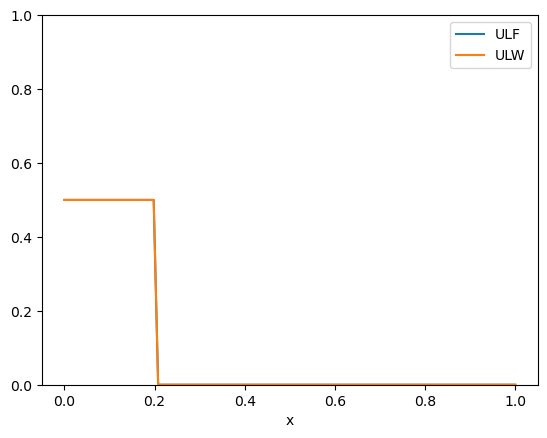

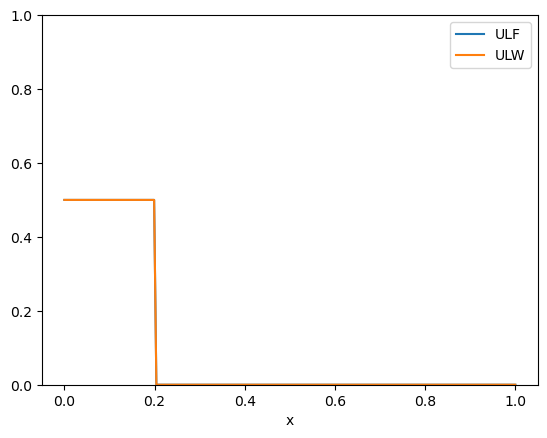

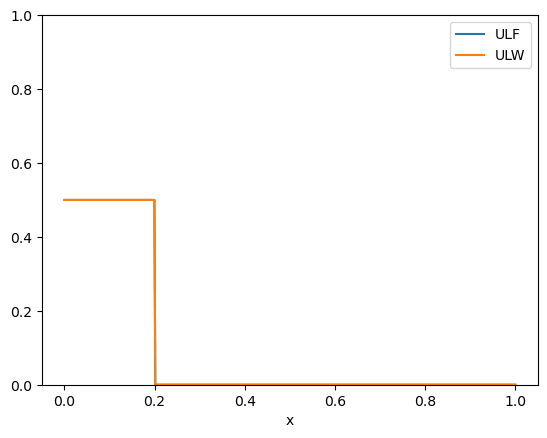

In [48]:
animaciones = []
for ULF, ULW, x in zip(sol_LF, sol_LW, X):
    animation = animar_soluciones_B(x, ULF, ULW)
    animaciones += [animation]

In [49]:
#HTML(animaciones[0].to_html5_video())
#HTML(animaciones[1].to_html5_video())
HTML(animaciones[2].to_html5_video())

Ahora, se modelará el efecto de un semáforo en rojo, el cual cambiará a verde en un par de segundos. Para ello, el tramo vial a estudiar corresponderá con el intervalo $\left[ 0,2\right] $.

Si existe un semáforo en $x=1$, nuestro dominio de interés para modelar el efecto de la luz roja mediante la ecuación de Burgers será el intervalo $\left[  0,1\right]  $. Suponga que los autos entran por $x=0$ a una velocidad constante, la cual se representará por $u\left(  t,0\right)  =u^{\ast}$. Por otra parte, los vehículos deben detenerse frente al semáforo, por lo que
$u(t,1)=-1$.

Además, se asume que todos los vehículos circulan a una velocidad inicial constante $u\left(  0,x\right)  =u^{\ast}$ hasta que ven el semáforo en rojo. En el instante $t=T$ en que el semáforo cambia a verde, la densidad de vehículos es nula en $\omega_{2}=\left(  1,2\right]  $. Luego, $u(T,x)=1$, para $x\in\omega_{2}$.

### P2
> Simule el efecto del semáforo que cambia de color rojo a verde.<br>
<br>
**a.** Resuelva numéricamente la ecuación de Burgers para $t\in\left[0,2\right]  $ en el dominio $\omega_{1}=\left[  0,1\right]  $, considerando la condición inicial:<br>
<br>
\begin{align*}
u\left(  0,x\right)  =\left\{
\begin{array}
[c]{cl}%
u^{\ast} & \text{si }0\leq x<1\\
-1 & \text{si }x=1
\end{array}
\right.
\end{align*}<br>
y las condiciones de frontera $u\left(  t,0\right)  =u^{\ast}$ y $u(t,1)=-1$, con $u^{\ast}=0.25$. Para ello, use el esquema de Lax-Friedrichs con $\Delta x=0.02$ y $\Delta t=0.1\Delta x$, simulando un semáforo en rojo que dure $T=2$.

In [50]:
u_star = 0.25
f = lambda x: x**2 / 2
a = 0
b = 1
ua = u_star
ub = -1
dx = 0.02
dt = 0.1 * dx
T = 2
N_T = int(T/dt)
N = int((b-a)/dx)
u0 = lambda x: -1 if x==1 else u_star

x, U = resolver_B(f, a, b, ua, ub, dt, N_T, N, u0, "LF")


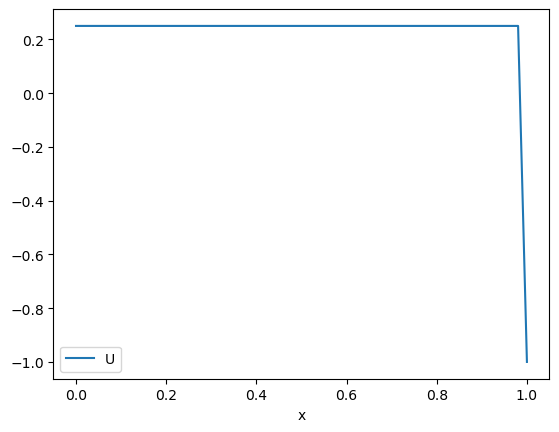

In [51]:
# Crea figura

fig, ax = plt.subplots()

# Funcion para animar
def animate(i):
    ax.clear()
    ax.plot(x, U[:, i], label="U")
    ax.legend()
    ax.set_xlabel("x")

NT = U.shape[1]

# Animación
animation = matplotlib.animation.FuncAnimation(
    fig, animate, frames=NT, interval=50, repeat=True
)

HTML(animation.to_html5_video())

> **b.** Resuelva numéricamente la ecuación de Burgers para $t\in\left[2,4\right]  $ y $\Omega=\omega_{1}\cup\omega_{2}=\left[  0,2\right]  $, considerando las condiciones de frontera $u\left(  t,0\right)  =u^{\ast}$ y $u(t,2)=1$, y la condición inicial dada por:

$$
u\left(  2,x\right)  =\begin{cases}
u_{R}\left(  2,x\right)   & \text{si }0\leq x\leq1\\
1 & \text{si }x>1
\end{cases}
$$

donde $u_{R}\left(  2,x\right)  $ es la solución numérica resultante en el ejercicio anterior. Use los mismos parámetros y esquema que la parte previa y grafique su solución solo en el conjunto $\omega_1$.

In [52]:
u_R = U[:,-1]
u_R = interp1d(x, u_R, kind='linear', fill_value='extrapolate')
f = lambda x: x**2 / 2
a, b, ua, ub = 0, 2, u_star, 1
dx = 0.02
dt = 0.1*dx
T = 2
N_T = int(T / dt)
N = int((b-a)/dx )
# interpolamos u_R
u0 = lambda x: u_R(x) if 0<=x<=1 else 1
x, ULF =  resolver_B(f, a, b, ua, ub, dt, N_T, N, u0, "LF")

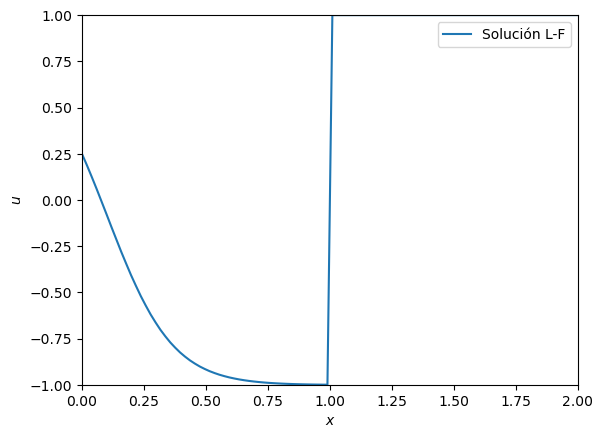

In [53]:
fig, ax = plt.subplots()

# Funcion para animar
def animate(i):
  ax.clear()
  ax.plot(x, ULF[:,i], label = "Solución L-F")
  ax.legend()
  ax.set_xlabel(r"$x$")
  ax.set_ylabel(r"$u$")
  ax.set_ylim(-1, 1)
  ax.set_xlim(0,2)

  NT = ULF.shape[1]
  #print(NT)
# Animación
animacion_P2b = matplotlib.animation.FuncAnimation(fig, animate, frames = NT , interval = 50 , repeat = True)
HTML(animacion_P2b.to_html5_video())

> **c.** Haga una interpretación de sus resultados, haciendo un análisis cualitativo de lo observado.

En la parte a, se puede apreciar como, a medida que avanza el tiempo, va aumentando la densidad en puntos cercanos a x = 1, donde se encuentra uvbicado el semáforo. Este es el comportamiento esperado del resultado pues es de esperarse que los autos se acumulen antes del semáforo. Posteriormente, en la parte b, se puede apreciar que los autos en es semáforo son los primeros en avanzar, esto corresponde con el comportamiento esperado pues no tienen a nadie en frente. Los autos atrás de los primeros, parece tener que eserar a que esto avancen para poder comnezar a avanzar.